### Things to try:
  - apply **XGB** with Random Forest regressor for Heating GC prediction https://xgboosting.com/
  - ~~apply all the data transformation to strat_test_set (multicolinearity, missing values, one hot encoding, robust scaler)~~
  - ~~grid to get the best hyperparameters for Stochastic Gradient Descent model~~
  - Pruning in decision tree classifier to delete non significant nodes






## Extract, Transform, Analyze Data

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#DATA_PATH = r'G:\Mi unidad\Data Science\house-prices-data'
DATA_PATH = '/content/drive/My Drive/Data_Science/house-prices-data'

def load_data(data_path = DATA_PATH, file_name = "train.csv"):
        csv_path = os.path.join(data_path, file_name)
        return pd.read_csv(csv_path)
df = load_data()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.shape

(1460, 81)

#### Assign values to ordered_categories (Excelent, Good, Average, Poor)

In [8]:
ordered_categories = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu",
                      "GarageFinish", "GarageQual", "GarageCond", "PoolQC"]
mapping = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0, "Gd":4, "Av":3, "Mn":2, "No":1, "GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "Fin":3, "RFn":2}
df[ordered_categories] = df[ordered_categories].replace(mapping)
df.drop(columns = "Id", inplace=True)

/tmp/ipython-input-1967364931.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[ordered_categories] = df[ordered_categories].replace(mapping)


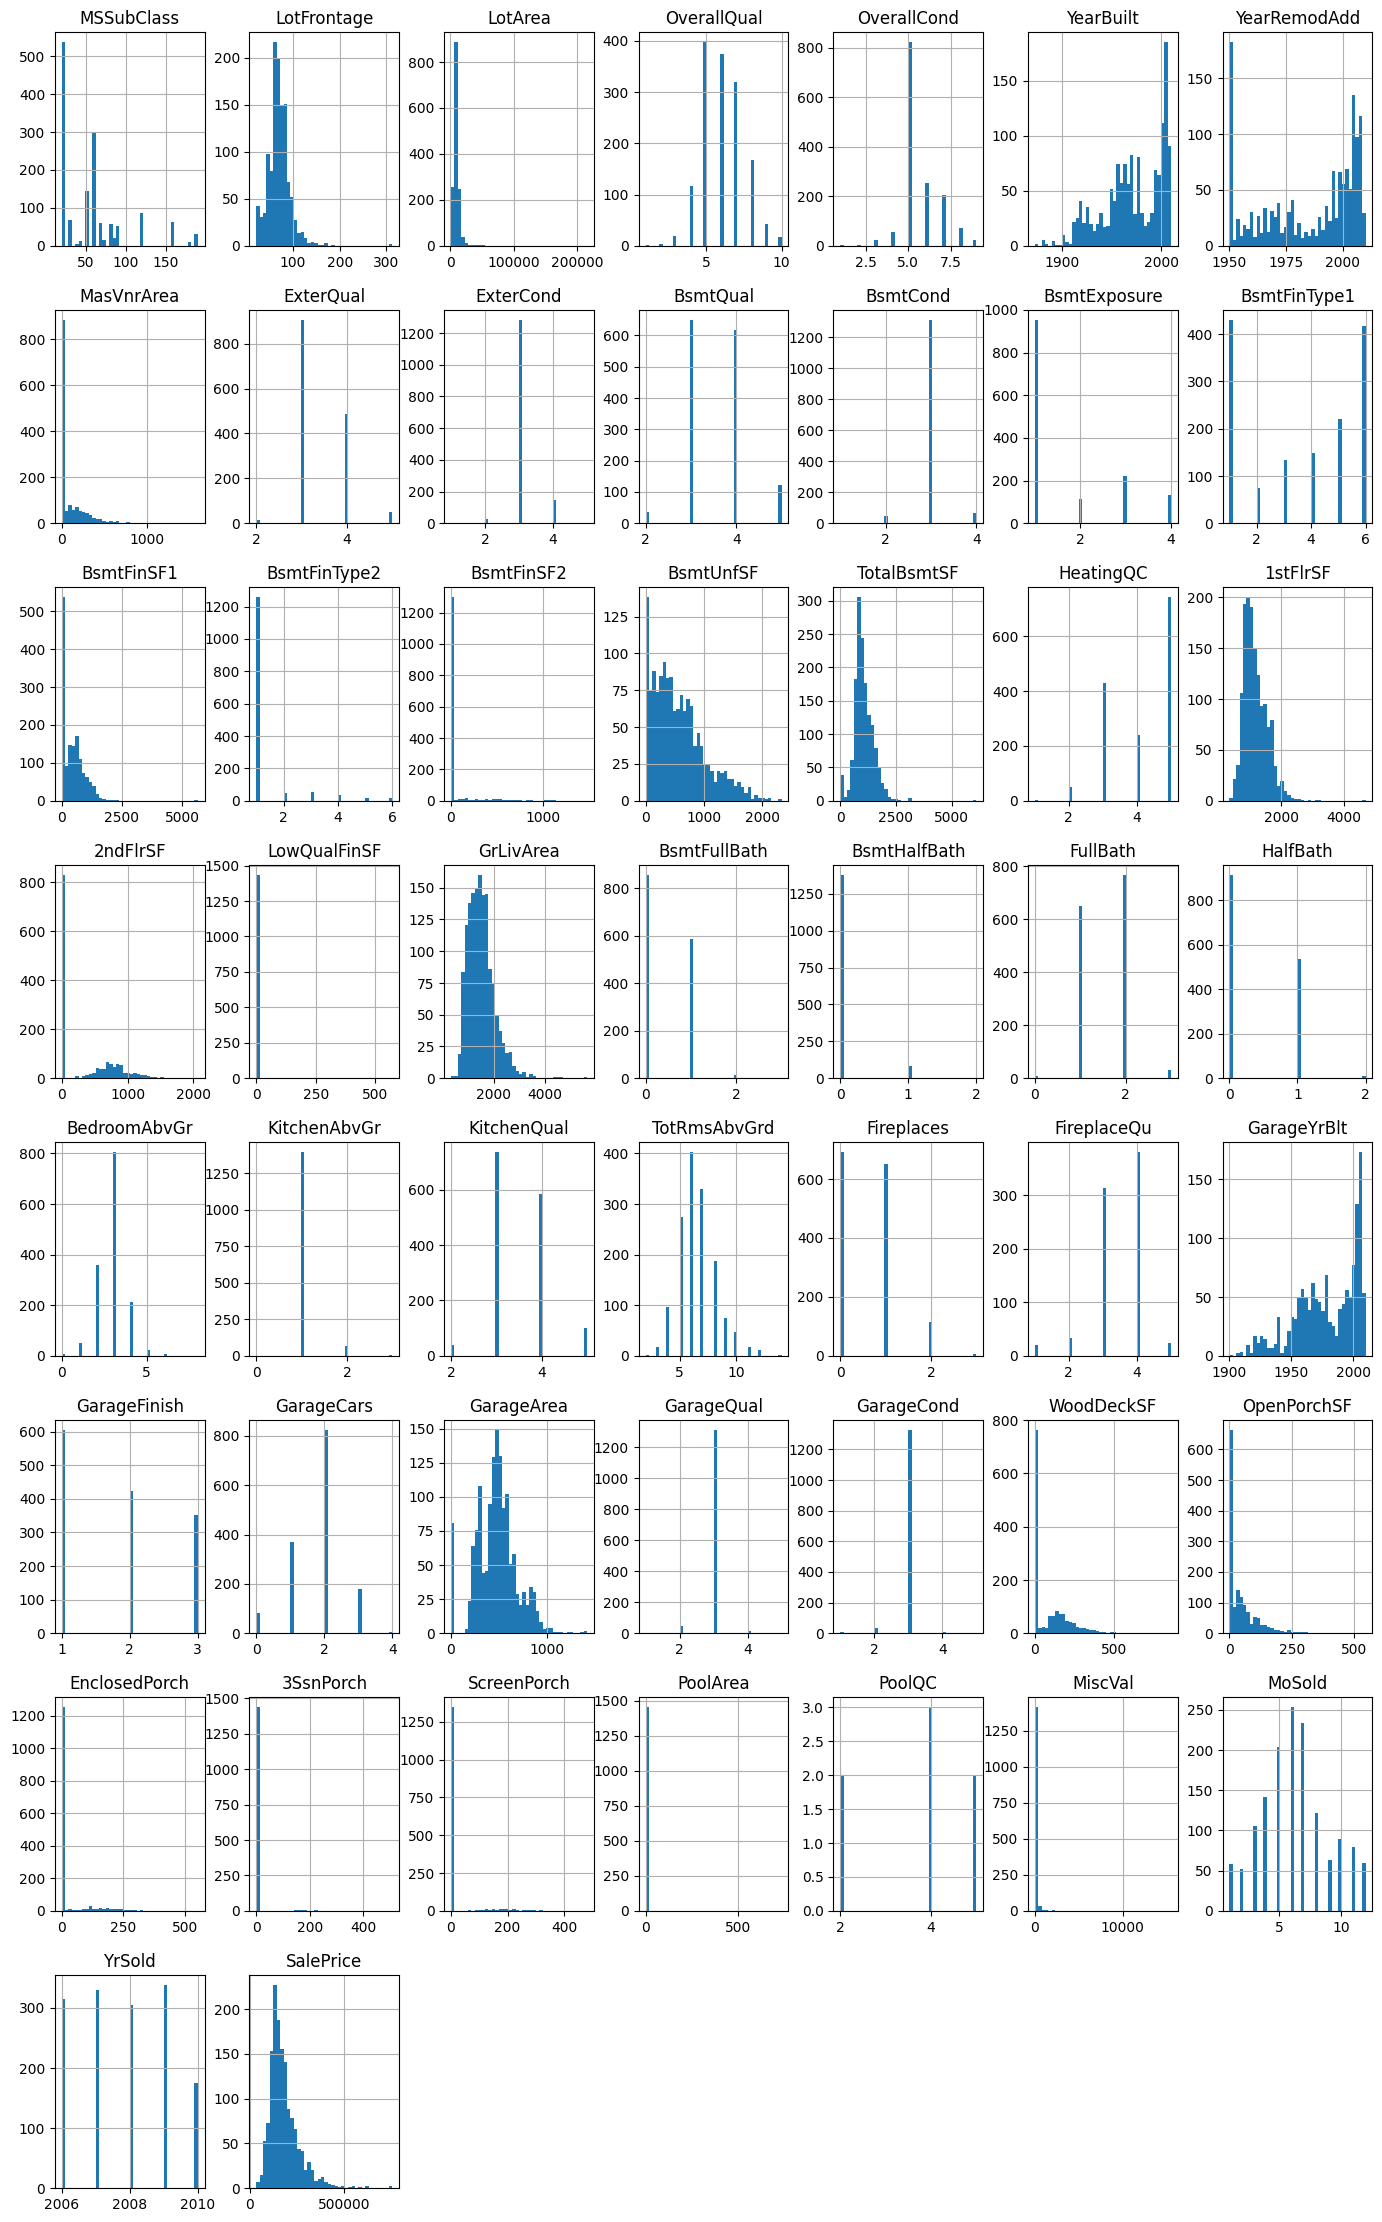

In [9]:
%matplotlib inline
df.hist(bins=40, figsize=(17,28))
plt.show()

## Test set creation

When you restart the notebook, the split is random again, so new rows end up in the test set or train set. But, as you try new model settings, tune hyperparameters, etc., you may accidentally use all the data for training across different experiments—just not at the same time!

Therefore, it is important to keep the same test set every time I re run the model and adjust the hyperparameters, etc

## Simple Data split

In [10]:
from sklearn.model_selection import train_test_split
train_set_simple_split, test_set_simple_split = train_test_split(df, test_size=0.2, random_state=42)

<Axes: >

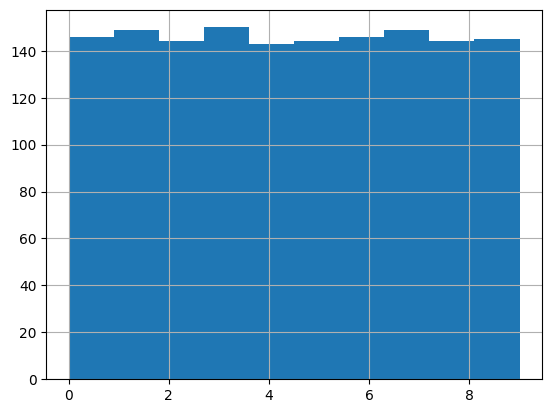

In [11]:
#  creation of First floor area category attribute (ranges of first floor area)
def stratification(df_to_strat):
    df_to_strat["SalePrice_cat"] = pd.qcut(df_to_strat["SalePrice"],  q = 10,  labels= False, duplicates="drop")
    return df_to_strat

df = stratification(df)
df["SalePrice_cat"].hist()

In [12]:
test_set = stratification(test_set_simple_split)
train_set = stratification(train_set_simple_split)

## Robust Datasplit with Stratification

In [13]:
# to have the same number of instances of attribute "GrLivArea_cat" as original df
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["SalePrice_cat"]):
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]

In [14]:
proportion_comparison = pd.DataFrame()
proportion_comparison["original"] = df["SalePrice_cat"].value_counts() / len(df)
proportion_comparison["random"] = train_set["SalePrice_cat"].value_counts() / len(train_set)
proportion_comparison["stratified"] = strat_train_set["SalePrice_cat"].value_counts() / len(strat_train_set)
proportion_comparison.sort_index(axis=0, ascending=True, inplace=True, kind='quicksort')
proportion_comparison

,original,random,stratified
SalePrice_cat,,,
0,0.100000,0.101027,0.100171
1,0.102055,0.105308,0.101884
2,0.098630,0.095034,0.098459
3,0.102740,0.099315,0.102740
4,0.097945,0.102740,0.098459
5,0.098630,0.098459,0.098459
6,0.100000,0.102740,0.100171
7,0.102055,0.098459,0.101884
8,0.098630,0.096747,0.098459


In [15]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("SalePrice_cat", axis=1, inplace=True)

## Visualize data to get Insights

In [16]:
housing = strat_train_set.copy()
housing_num = housing.select_dtypes(include = 'number')

In [17]:
corr_matrix = housing_num.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790316
GrLivArea,0.705177
ExterQual,0.681029
KitchenQual,0.660203
BsmtQual,0.644041
GarageCars,0.637729
GarageArea,0.608436
TotalBsmtSF,0.599422
1stFlrSF,0.598041


array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabe

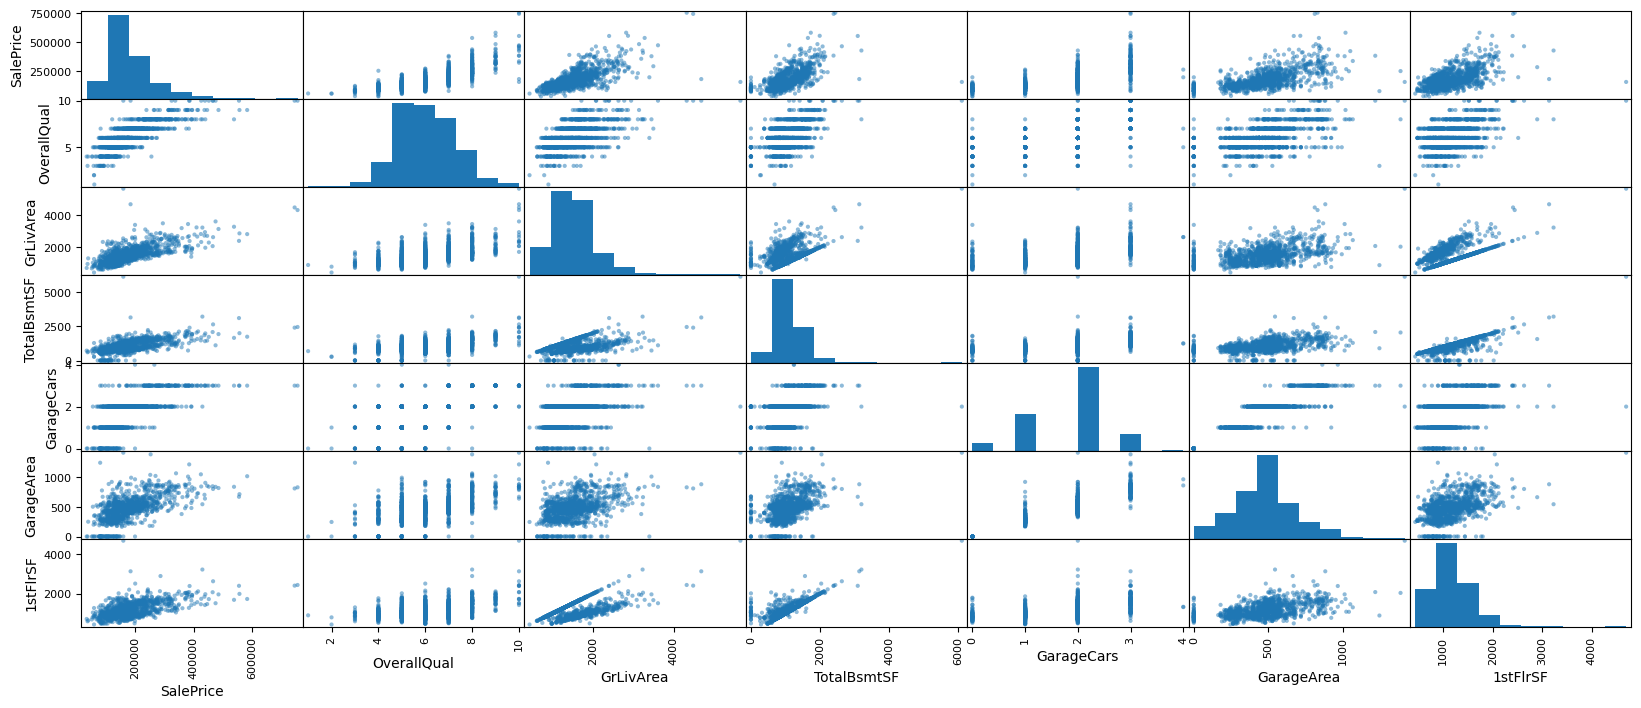

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice","OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "GarageArea", "1stFlrSF"]
scatter_matrix(housing[attributes], figsize =(20,8))

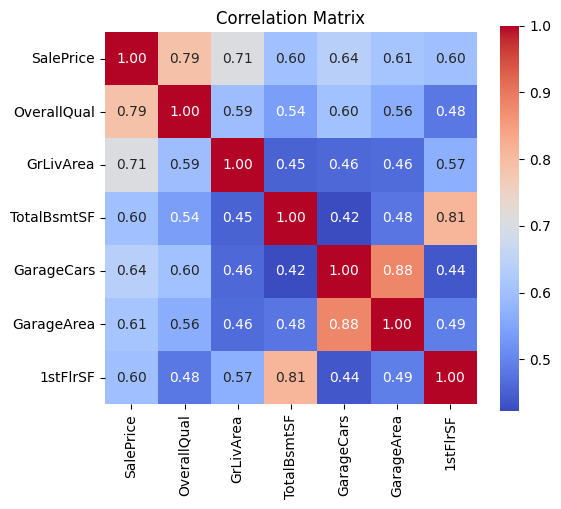

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(6, 5))
corr = housing[attributes].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

## Missing values

 You have three options:
1. Get rid of the corresponding rows (for low number of null vallues and missingness appears random)
2. Get rid of the whole attribute. (If missing values are >30-40% and column is not critical in model performance)
3. Set the values to some value (zero, the mean, the median, etc.)

In [20]:
def check_null_values(df):
    null_counts = df.isnull().sum()
    null_table = null_counts[null_counts > 0].reset_index()
    null_table = null_table.sort_values(by = 0, ascending = False)
    null_table.rename(columns = {"index": "Attribute", 0: "Null Count"}, inplace = True)
    return null_table
null_table = check_null_values(housing)
null_table.head(7)

,Attribute,Null Count
16,PoolQC,1161
18,MiscFeature,1125
1,Alley,1095
17,Fence,943
2,MasVnrType,693
10,FireplaceQu,555
0,LotFrontage,212


Deleting columns whose NaN values are higher than 40%

In [21]:
col_delete = null_table[null_table["Null Count"] > len(housing)*0.5 ]["Attribute"].values
housing.drop(columns = col_delete, inplace = True)

### Imputer

SimpleImputer

In [22]:
# nulls rows could be deleted for "MasVnrArea" because it has only 5 missing values, 0.33% of the total rows: housing.dropna(subset=["MasVnrArea"], inplace=True)
# cols with null values will be filled with the mean value of the attribute, missing values for each column represent less than 15%
from sklearn.impute import SimpleImputer

categorical_cols = list(housing.select_dtypes(include = ['object', 'category']))
imputer_cat = SimpleImputer(strategy="most_frequent")
housing[categorical_cols] = imputer_cat.fit_transform(housing[categorical_cols])

housing_num = housing.select_dtypes(include = 'number')
imputer = SimpleImputer(strategy="mean")
imputer.fit(housing_num) # imputer.statistics_ will contain the mean values of each column

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing[housing_num.columns] = housing_tr

### Multicollinearity

In [23]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.feature_selection import mutual_info_regression

def select_by_corr_clustering(df, target, corr_threshold=0.8, pearson_tol=0.3, mi_random_state=0):
    """
    1) Build |corr| matrix among predictors.
    2) Convert to a distance matrix d = 1 - |corr|.
    3) Hierarchical clustering on distances.
    4) From each cluster, keep ONE feature:
       - Highest |Pearson(feature, target)|
       - If |Pearson| within pearson_tol, choose higher MI(feature, target).
    """

    df = df.select_dtypes(include='number').copy()
    if target not in df.columns:
        raise KeyError(f"Target '{target}' not found in df")
    if df.isna().any().any():
        raise ValueError("NaNs detected: impute before running selection")
    X = df.drop(columns=[target])
    y = df[target]

    pearson = df.corr()[target].abs().drop(target).fillna(0.0)
    mi = pd.Series(
        mutual_info_regression(X, y, random_state=mi_random_state),
        index=X.columns
    ).fillna(0.0)

    corr = X.corr().abs().fillna(0.0)
    dist = 1 - corr
    np.fill_diagonal(dist.values, 0.0)

    condensed = squareform(dist.values, checks=False)
    Z = linkage(condensed, method='average')

    distance_cut = 1 - corr_threshold
    clusters = fcluster(Z, t=distance_cut, criterion='distance')
    cluster_map = pd.DataFrame({'feature': corr.columns, 'cluster': clusters})

    selected = []
    for cid, grp in cluster_map.groupby('cluster'):
        feats = grp['feature'].tolist()

        # pick best by Pearson; if |diff| <= pearson_tol, break tie by MI
        feats_sorted = sorted(
            feats,
            key=lambda f: (round(pearson.get(f, 0.0), 12), round(mi.get(f, 0.0), 12)),
            reverse=True
        )

        best = feats_sorted[0]
        if len(feats_sorted) >= 2:
            f1, f2 = feats_sorted[0], feats_sorted[1]
            if abs(pearson[f1] - pearson[f2]) <= pearson_tol:

                best = f1 if mi[f1] >= mi[f2] else f2

        selected.append(best)
    return selected

selected_features = select_by_corr_clustering(housing, 'SalePrice', corr_threshold=0.85, pearson_tol=0.3)
print(selected_features)
selected_features.append('SalePrice')
housing_clean = housing[selected_features]

['LowQualFinSF', 'PoolArea', 'OverallCond', 'ExterCond', 'BsmtCond', 'BsmtHalfBath', 'GarageQual', 'GarageCond', 'EnclosedPorch', 'MSSubClass', 'KitchenAbvGr', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtExposure', 'GrLivArea', 'TotRmsAbvGrd', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotalBsmtSF', '1stFlrSF', 'LotFrontage', 'Fireplaces', 'LotArea', 'GarageCars', 'YearBuilt', 'GarageYrBlt', 'BsmtQual', 'OverallQual', 'ExterQual', 'KitchenQual', 'YearRemodAdd', 'GarageFinish', 'HeatingQC', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinType2', 'BsmtFinSF2', 'FireplaceQu', 'ScreenPorch', 'MoSold', 'YrSold', '3SsnPorch', 'MiscVal']


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif_df = pd.DataFrame()
    vif_df["variables"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif_df = vif_df.sort_values(by = "VIF", ascending = False).reset_index(drop = True)
    return (vif_df)

def correlation_cleaning_1(df, target1):
    df_features = df.drop(target1, axis=1)
    df_cleaned = df_features.select_dtypes(include = 'number')
    vif = calc_vif(df_cleaned)

    while vif["VIF"].max() > 5:
        var = vif.loc[vif["VIF"].idxmax(), "variables"]
        df_cleaned.drop(columns = var, inplace = True)
        vif = calc_vif(df_cleaned)
    return df_cleaned, vif

features_num, final_vif = correlation_cleaning_1(housing_clean, "SalePrice")

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Handling with strings

If text is not arbitrary and unique values are limited, then the attribute can be a categorical attribute and can be converted to a numerical value.

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
features_cat = housing.select_dtypes(include=['object', 'category'])
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(features_cat) # 2D array with categorical values
ordinal_encoder.categories_[0:4]

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object)]

#### *one-hot encoding* to not ordered categories

only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
NOTE: When categorical attribute has a large number of categories, one-hot encoding can slow down the training and performance. categories can be replaced with useful numerical features (e.i. country code by GDP per capita and population). Alternatively, categories can be replaced by a learnable, low-dimensional vector called an embedding.

In [27]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
features_cat_1hot = cat_encoder.fit_transform(features_cat) # sparse matrix with categorical values. Only saves the non-zero values to save memory
#housing_cat_1hot.toarray() # convert sparse matrix to dense array for better visualization
features_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29200 stored elements and shape (1168, 173)>

## Robust scaler
Features with very different scales are harder to visualize and most important, generate a bias in ML models.  

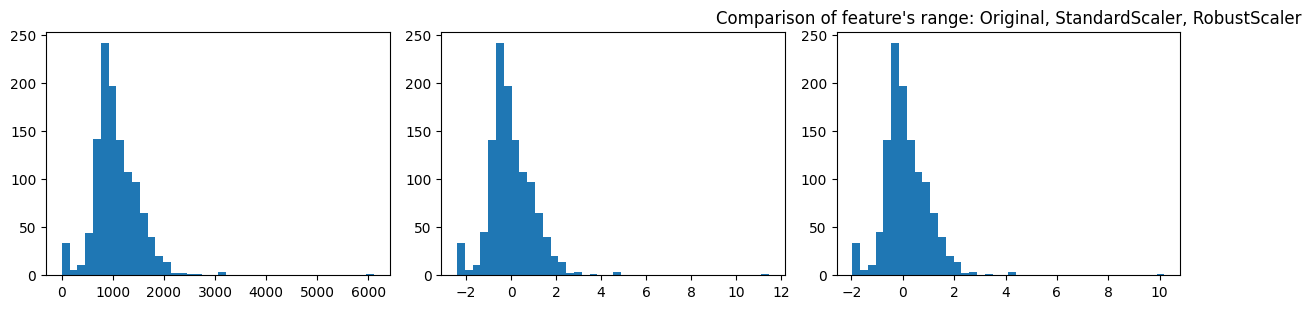

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
test = housing[["TotalBsmtSF"]]

standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(test)

robust_scaler = RobustScaler()
x_robust = robust_scaler.fit_transform(test)

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].hist(housing["TotalBsmtSF"], bins=40, label = 'TotalBsmtSF')
axs[1].hist(x_standard, bins=40, label = 'Stardard_TotalBsmtSF')
axs[2].hist(x_robust, bins=40, label = 'Robust_TotalBsmtSF')
plt.tight_layout()
plt.title("Comparison of feature's range: Original, StandardScaler, RobustScaler")
plt.show()

## Transformation Pipelines

Previously missing values were treated with the sklearn SimpleImputer by calling manually the fit and transform methods. Nevertheless, Pipelines can run this and more classes in a row

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# full pipeline that handles the transformation for the two groups of columns (numerical and categorical). Each tuple has: a name, Transformer and a list of columns
# the columns not listed will be dropped by default. to prevent this we can specify "pas through"

num_pipeline = Pipeline([
    ('std_scaler', RobustScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, selector(dtype_include = np.number)), #returns a dense matrix
    ('cat', OneHotEncoder(handle_unknown="ignore"), selector(dtype_include = object)) #returns a sparse matrix
])

features = features_num.join(features_cat, how = 'left')
features_prepared = full_pipeline.fit_transform(features)

# ColumnTransformer returns a sparse matrix if density (ratio of non zero cells) is lower than 0.3 (By default)
# here, as matrix had a large amount of non zero cells, it returns a dense matrix

#to call an attribute use named_transformers_["transformer's instance"].attribute
#full_pipeline.named_transformers_['cat'].categories_

labels = housing_clean["SalePrice"].copy()
y_scaler = RobustScaler()
labels_scaled = y_scaler.fit_transform(labels.values.reshape(-1,1)).flatten()

## Test set transformation
- ~~delete columns with null values higher than 40%~~
- ~~impute null numerical and categorical values with imputer_cat = SimpleImputer(strategy="most_frequent") and imputer = SimpleImputer(strategy="mean").~~
- ~~deleted some columns because of Multicolinearity columns are in final_vif~~
- applied OneHotEncoder() to categorical values - applied RobustScaler() to all columns what steps should I replicate in the test set?
- modify y label too

In [30]:
def preprocessing_test_set(df_train_final, df_test, preprocessing_pipeline, labels_scaler, target):
  #null value imputing
  categorical_cols = list(imputer_cat.feature_names_in_)
  numerical_cols = list(imputer.feature_names_in_)
  df_test.loc[:,categorical_cols] = imputer_cat.transform(df_test[categorical_cols])
  df_test.loc[:,numerical_cols] = imputer.transform(df_test[numerical_cols])

  #keep only columns of train set
  columns_train = df_train_final.columns
  df_test_final = df_test[columns_train].copy()

  #scaling and encoding categorical variables
  test_set_preprocessed = preprocessing_pipeline.transform(df_test_final)
  #labels
  labels = df_test[target].copy()
  labels_scaled = labels_scaler.transform(labels.values.reshape(-1,1)).flatten()
  return test_set_preprocessed, labels, labels_scaled

test_transformed, test_y, test_y_scaled = preprocessing_test_set(features, strat_test_set, full_pipeline, y_scaler, "SalePrice")

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lin_reg = LinearRegression() # Use the Ordinary Least Squares to calculate coefficients tetha by minimizing MSE. Gradient descent is an algorithm for this too
lin_reg.fit(features_prepared, labels_scaled)

housing_pred_scaled = lin_reg.predict(features_prepared)
housing_pred = y_scaler.inverse_transform(housing_pred_scaled.reshape(-1,1)).ravel()
lin_mae = mean_absolute_error(labels, housing_pred) #Average difference between the predicted and actual values
r2 = lin_reg.score(features_prepared, labels_scaled) #R² determination coefficient

test_pred_scaled = lin_reg.predict(test_transformed)
test_pred = y_scaler.inverse_transform(test_pred_scaled.reshape(-1,1)).ravel()
test_lin_mae = mean_absolute_error(test_y, test_pred) #Average difference between the predicted and actual values
test_r2 = lin_reg.score(test_transformed, test_y_scaled) #R² determination coefficient

print(f'Linear Regression train set: R²: {r2}, MAE: {lin_mae}, Sale price range: {labels.min(), labels.max()}')
print(f'Test set: R²: {test_r2}, MAE: {test_lin_mae}, Sale price range: {test_y.min(), test_y.max()}')
#print(f"Intercept: {lin_reg.intercept_}, Coefficients: {lin_reg.coef_}")

Linear Regression train set: R²: 0.86104432052562, MAE: 21086.682577361753, Sale price range: (34900.0, 755000.0)
Test set: R²: 0.7772339698381077, MAE: 26657.4889032184, Sale price range: (35311, 625000)


### Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    loss="huber", # less focus and correction of outliers
    penalty="l2", # penalty hyperparameter of Ridge Regression
    learning_rate="adaptive",
    eta0=0.001,
    max_iter=4000,
    tol=1e-3,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=30,
    average=True,
    random_state=10
)
sgd_reg.fit(features_prepared, labels_scaled)
sgd_housing_pred_scaled = sgd_reg.predict(features_prepared)
sgd_housing_pred = y_scaler.inverse_transform(sgd_housing_pred_scaled.reshape(-1,1)).ravel()
sgd_mse = mean_squared_error(labels, sgd_housing_pred) #Average difference between the predicted and actual values
sgd_rmse = np.sqrt(sgd_mse)  #square root #RMSE: Root Mean Squared Error
sgd_r2 = sgd_reg.score(features_prepared, labels_scaled) #R² determination coefficient
print(f'Stochastic Gradient Descent R²: {sgd_r2}, RMSE: {sgd_rmse}')

Stochastic Gradient Descent R²: 0.5103210195309846, RMSE: 55457.677111635094


## Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

num_pipeline_poly = Pipeline([
    ('std_scaler_2', RobustScaler()),
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False))
])

full_pipeline_poly = ColumnTransformer([
    ('num_poly', num_pipeline_poly, selector(dtype_include=np.number)),
    ('cat_poly', OneHotEncoder(), selector(dtype_include=object))
])
feat_prepared_poly = full_pipeline_poly.fit_transform(features)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(feat_prepared_poly, labels_scaled)
lin_reg_poly_pred_scaled = lin_reg_poly.predict(feat_prepared_poly)
lin_reg_poly_pred = y_scaler.inverse_transform(lin_reg_poly_pred_scaled.reshape(-1,1)).ravel()
lin_reg_poly_rmse = np.sqrt(mean_squared_error(labels, lin_reg_poly_pred))
lin_reg_poly_r2 = lin_reg_poly.score(feat_prepared_poly, labels_scaled)
print(f'Polynomial Regression 2nd grade R²: {lin_reg_poly_r2}, RMSE: {lin_reg_poly_rmse}')

Polynomial Regression 2nd grade R²: 0.9137909152608406, RMSE: 23269.254033312915


### Polynomial Regression with stochastic gradient descend algorithm with Lasso Regularization
(Lasso regularization tends to eliminate less important features)

In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    loss="huber",
    penalty="l1", # penalty hyperparameter of Ridge Regression
    learning_rate="adaptive",
    eta0=0.001,
    max_iter=4000,
    tol=1e-3,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=20,
    average=True,
    random_state=10
)
sgd_reg.fit(feat_prepared_poly, labels_scaled)
sgd_housing_pred_scaled = sgd_reg.predict(feat_prepared_poly)
sgd_housing_pred = y_scaler.inverse_transform(sgd_housing_pred_scaled.reshape(-1,1)).ravel()
sgd_mse = mean_squared_error(labels, sgd_housing_pred) #Average difference between the predicted and actual values
sgd_rmse = np.sqrt(sgd_mse)  #square root #RMSE: Root Mean Squared Error
sgd_r2 = sgd_reg.score(feat_prepared_poly, labels_scaled) #R² determination coefficient
print(f'Stochastic Gradient Descent R²: {sgd_r2}, RMSE: {sgd_rmse}')

Stochastic Gradient Descent R²: -219545478006150.7, RMSE: 1174270611421.1423


## Cross-validation - Linear Regression
dataset is splitted in 10 smaller datasets. Model is trained 10 times to get an array with the 10 RMSE

In [35]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg_ttr = TransformedTargetRegressor(
    regressor = lin_reg,
    transformer = RobustScaler()
)
scores = cross_val_score(lin_reg_ttr, features_prepared, labels, scoring="neg_mean_absolute_error", cv=10)
def display_scores(scores):
    print("Linear Regression - Mean (mean of MAEs):", scores.mean())
    print(f"Standard deviation: {scores.std()}, std%: {np.round(scores.std()/scores.mean(),4)*100}%")
    #how stable is the model. if >30% model is overfitted if training in the whole train test has good R2
display_scores(-scores)

Linear Regression - Mean (mean of MAEs): 26470.86375632498
Standard deviation: 1997.3192200098738, std%: 7.55%


### Cross-validation - Polynomial Regression

In [36]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
polylomial_reg_ttr = TransformedTargetRegressor(
    regressor = lin_reg,
    transformer = RobustScaler()
)
scores = cross_val_score(polylomial_reg_ttr, feat_prepared_poly, labels, scoring="neg_mean_absolute_error", cv=10)
def display_scores(scores):
    print("Polynomial Regression Mean (mean of MAEs):", scores.mean()) #Mean Absolute Error
    print(f"Standard deviation: {scores.std()}, std%: {np.round(scores.std()/scores.mean(),4)*100}%")
    #how stable is the model. if >30% model is overfitted
display_scores(-scores)

Polynomial Regression Mean (mean of MAEs): 40063.44048764495
Standard deviation: 25800.314111639367, std%: 64.4%


### Cross-validation - Huber Regression (reduce influence of outliers)

In [37]:
from sklearn.linear_model import HuberRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning

huber = HuberRegressor(max_iter=4500, alpha=1e-3, epsilon=1.5, tol=1e-4)
huber_reg_ttr = TransformedTargetRegressor(
    regressor = huber,
    transformer = RobustScaler()
)
scores = cross_val_score(huber_reg_ttr, features_prepared, labels, scoring="neg_mean_absolute_error", cv=10)
def display_scores(scores):
    print("Huber Regression - Mean (mean of MAEs):", scores.mean())
    print(f"Standard deviation: {scores.std()}, std%: {np.round(scores.std()/scores.mean(),3)*100}%")
    #how stable is the model. if >30% model is overfitted if training in the whole train test has good R2
warnings.filterwarnings("ignore", category=ConvergenceWarning)
display_scores(-scores)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

Huber Regression - Mean (mean of MAEs): 24327.673334718136
Standard deviation: 2074.726149664068, std%: 8.5%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
huber = HuberRegressor(max_iter=4500, alpha=1e-3, epsilon=1.5, tol=1e-4)
huber.fit(features_prepared, labels_scaled)

huber_pred_scaled = huber.predict(features_prepared)
huber_pred = y_scaler.inverse_transform(huber_pred_scaled.reshape(-1,1)).ravel()
lin_mae = mean_absolute_error(labels, huber_pred) #Average difference between the predicted and actual values
r2 = r2_score(labels, huber_pred) #R² determination coefficient

print(f'Huber Regression: R²: {r2}, MAE: {lin_mae}, Sale price range: {labels.min(), labels.max()}')

Huber Regression: R²: 0.8204595987860204, MAE: 20771.510618290526, Sale price range: (34900.0, 755000.0)


## Preparing for Logistic Regression

Choosing a variable to regress

array([[<Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>]], dtype=object)

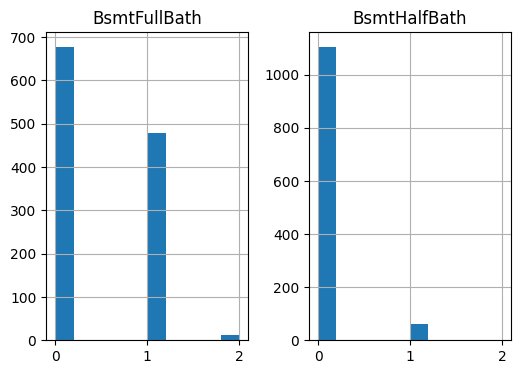

In [39]:
candidates = ["LandSlope", "Street", "CentralAir", "BsmtFullBath", "BsmtHalfBath"]
features[candidates].hist(bins=10, figsize=(6,4))
#BsmtFullBath has a decent distribution and good data amount

<Figure size 400x700 with 0 Axes>

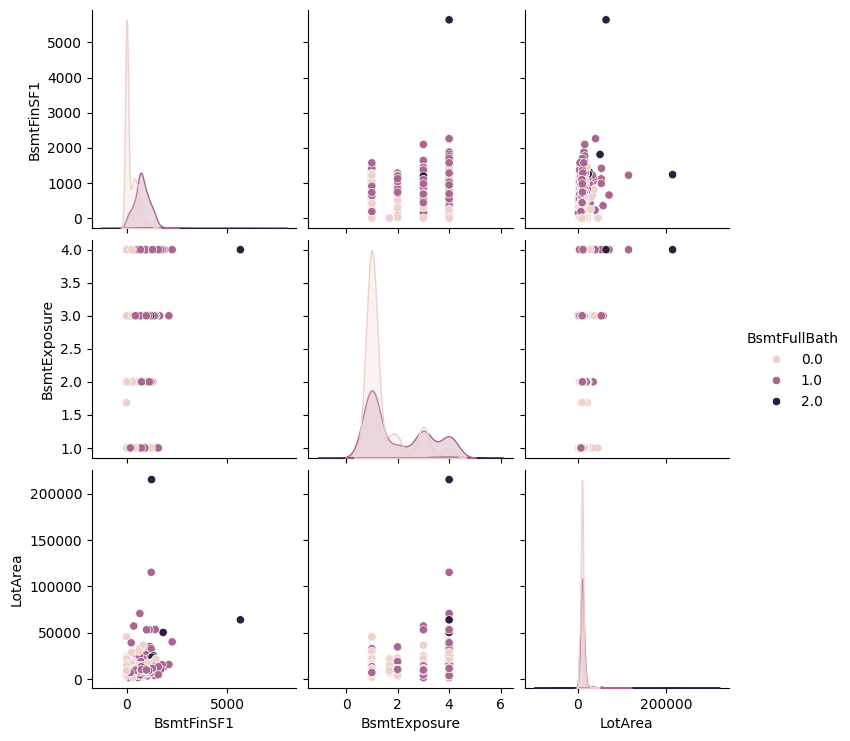

In [40]:
fig = plt.figure(figsize  = (4,7))
sample = features_num.corr()["BsmtFullBath"].sort_values(ascending=False).head(4)
sample = np.array(sample.index)
sample = features_num[sample]
sns.pairplot(data = sample, hue = 'BsmtFullBath')
plt.show()

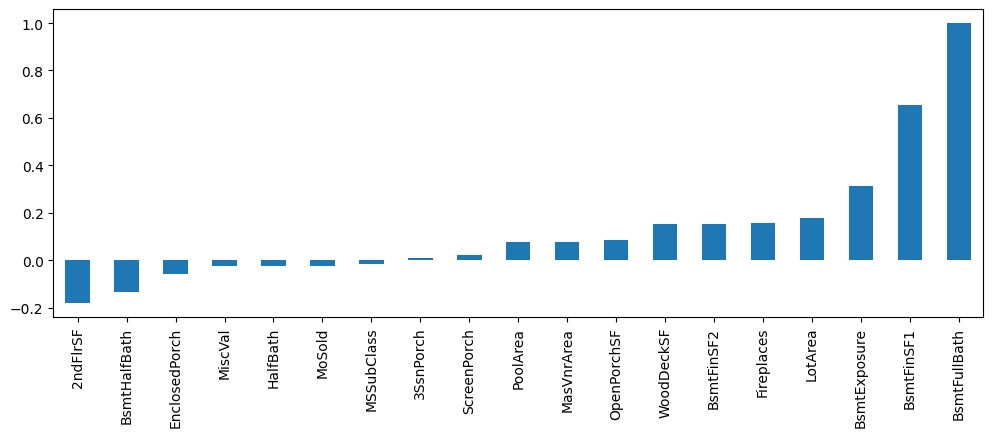

In [41]:
fig = plt.figure(figsize  = (12,4))
features_num.corr()["BsmtFullBath"].sort_values(ascending=True).plot(kind = 'bar')
plt.show()

In [42]:
from sklearn.base import clone

X2 = features.drop("BsmtFullBath", axis = 1)
y2 = features["BsmtFullBath"].values

full_pipeline2 = clone(full_pipeline)
X2_transformed = full_pipeline2.fit_transform(X2)
scaler2 = RobustScaler()
y2_scaled = scaler2.fit_transform(y2.reshape(-1,1)).flatten()

## Multinomial Logistic Regression

BsmtFullBath feature has three possible values: 0, 1, 2.

- class_weight: Because of the low representation of class 2, it is set as "Balanced".

- Because these classes are dependent and not random classes, Multinomial regression is applied and not One vs Rest

- solver: newton-cg is good for multiclass classification problems

#### Grid Search CV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [
 {'class_weight': [None, 'balanced'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
 ]
# liblinear doesn’t support multinomial; it forces OvR
log_reg_grid = LogisticRegression()
grid_search = GridSearchCV(log_reg_grid, param_grid, cv = 5, scoring = "accuracy", return_train_score = True)
grid_search.fit(X2_transformed, y2)
print(f'Best parameters: {grid_search.best_params_}, Best score: {grid_search.best_score_}')

Best parameters: {'class_weight': None, 'solver': 'newton-cg'}, Best score: 0.8236565056307545


#### Model Training



In [44]:
log_reg = LogisticRegression(solver = 'newton-cg')
log_reg.fit(X2_transformed, y2)
y2_pred_scaled = log_reg.predict(X2_transformed)
y2_pred = scaler2.inverse_transform(y2_pred_scaled.reshape(-1,1)).ravel()
log_pred_mae = mean_absolute_error(y2, y2_pred) #Average difference between the predicted and actual values
r2 = log_reg.score(X2_transformed, y2) #accuracy
print(f'Linear Regression: R²: {r2}, MAE: {log_pred_mae}, Sale price range: {y2.min(), y2.max()}')

Linear Regression: R²: 0.8818493150684932, MAE: 0.11815068493150685, Sale price range: (np.float64(0.0), np.float64(2.0))


#### Model Evaluation

In [45]:
log_reg.predict_proba(X2_transformed)

array([[9.66870572e-01, 3.31128776e-02, 1.65500303e-05],
       [9.35139461e-01, 6.41746838e-02, 6.85855514e-04],
       [9.89968111e-01, 1.00318892e-02, 6.65699115e-19],
       ...,
       [7.54124484e-01, 2.45875477e-01, 3.93018769e-08],
       [4.88602175e-03, 9.93101518e-01, 2.01245989e-03],
       [2.34105599e-02, 9.69691977e-01, 6.89746358e-03]])

In [46]:
#importance of each attribute
log_reg.coef_[1][:4]

array([ 8.35473090e-04, -1.70526560e+00,  2.86929204e-02,  1.15914083e-01])

Axes(0.125,0.11;0.775x0.77)


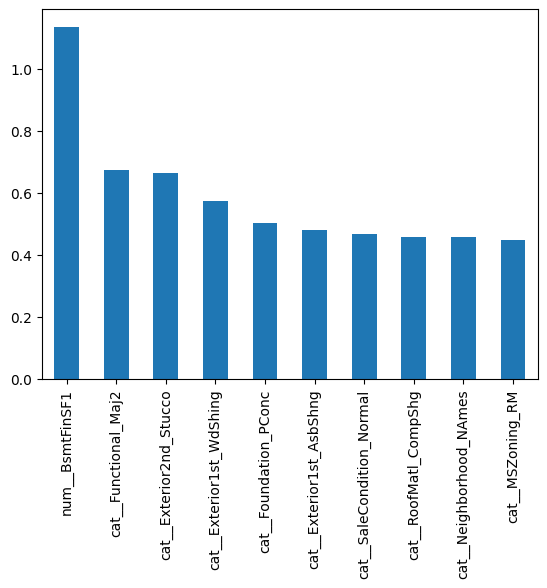

In [47]:
features_name = full_pipeline2.get_feature_names_out()
weights_0 = pd.Series(log_reg.coef_[1], index = features_name)
print(weights_0.sort_values(ascending=False)[:10].plot(kind = 'bar'))

<Figure size 800x800 with 0 Axes>

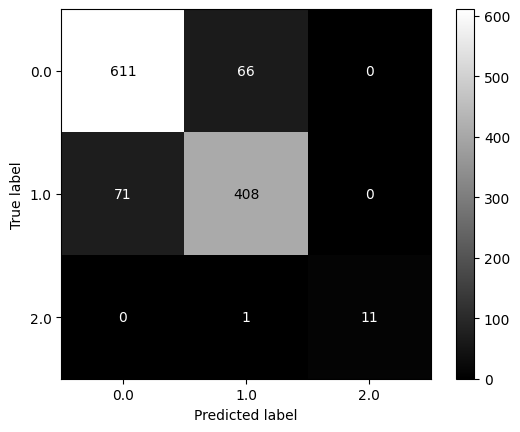

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize  = (8,8))
cm = confusion_matrix(y2, y2_pred, labels = log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap = 'gray')
plt.show()

## Decision Tree model

Possible features for classification:


*   ExterQual
*   ExterCond
*   HeatingQC
*   KitchenQual
*   GarageCond






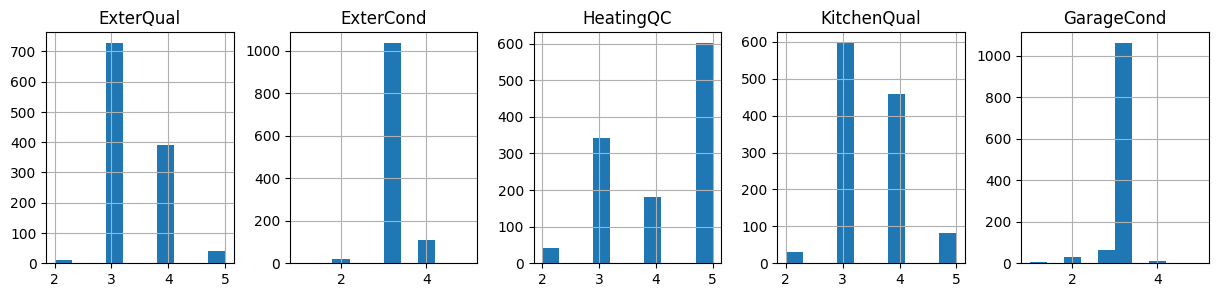

In [49]:
%matplotlib inline
candidates = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual", "GarageCond"]
housing[candidates].hist(bins=10, layout=(1, 5), figsize=(15,3))
plt.show()

#### cleaning and transformation

In [50]:
num_pipeline3 = Pipeline([
    ('std_scaler', RobustScaler())
])

full_pipeline3 = ColumnTransformer([
    ('num', num_pipeline3, selector(dtype_include = np.number)), #returns a dense matrix
    ('cat', OneHotEncoder(handle_unknown="ignore"), selector(dtype_include = object)) #returns a sparse matrix
])

features_cat2 = housing.select_dtypes(include=['object', 'category'])
features_num2, final_vif2 = correlation_cleaning_1(housing.drop("SalePrice", axis = 1), "HeatingQC")

features3 = features_num2.join(features_cat2, how = 'left')

X3 = full_pipeline3.fit_transform(features3)
y3 = housing["HeatingQC"].copy()
y3_scaler = RobustScaler()
y3_scaled = y3_scaler.fit(y3.values.reshape(-1,1))
#transformation of test set
test_transformed_3, test_y3, test_y3_scaled = preprocessing_test_set(features3, strat_test_set, full_pipeline3, y3_scaler, "HeatingQC")

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#### Decision Tree training

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 17, random_state=42, criterion = 'gini')
#max_depth controls the number of levels. random_state controls randomness. dictates which of the equally good features is selected for splitting a node
#criterion cane be 'gini', 'entropy'
tree.fit(X3, y3)
y3_pred = tree.predict(X3)

In [52]:
from sklearn.metrics import accuracy_score, f1_score

train_accuracy = accuracy_score(y3, y3_pred)
test_accuracy = accuracy_score(test_y3, tree.predict(test_transformed_3))

train_f1_macro = f1_score(y3, y3_pred, average = 'macro')
test_f1_macro = f1_score(test_y3, tree.predict(test_transformed_3), average = 'macro')

train_f1_weighted = f1_score(y3, y3_pred, average = 'weighted')
test_f1_weighted = f1_score(test_y3, tree.predict(test_transformed_3), average = 'weighted')

print(f"""Train accuracy: {train_accuracy}. \nTrain f1 macro (mean of f1 score for each label): {train_f1_macro} \nTrain f1_weighted (F1 scores mean Weighted by the number of true instances for each label): {train_f1_weighted}""")

print(f"""\nTest accuracy: {test_accuracy}. \nTest f1 macro: {test_f1_macro} \nTest f1_weighted: {test_f1_weighted}""")

Train accuracy: 0.6618150684931506. 
Train f1 macro (mean of f1 score for each label): 0.4875292444689281 
Train f1_weighted (F1 scores mean Weighted by the number of true instances for each label): 0.6321085633785223

Test accuracy: 0.6198630136986302. 
Test f1 macro: 0.36740199415159636 
Test f1_weighted: 0.5740065778921498


<Figure size 2000x1000 with 0 Axes>

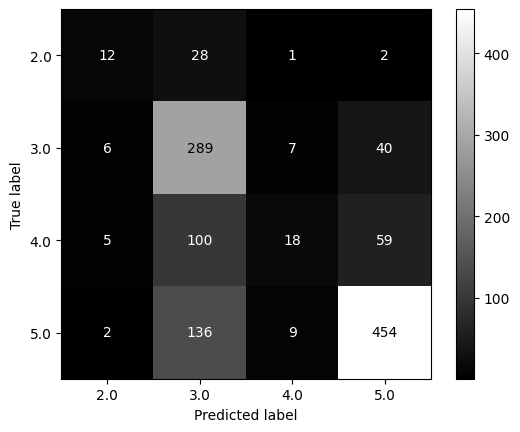

In [53]:
plt.figure(figsize=(20, 10))
cm_tree = confusion_matrix(y3, y3_pred, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels= tree.classes_)
disp.plot(cmap = 'gray')

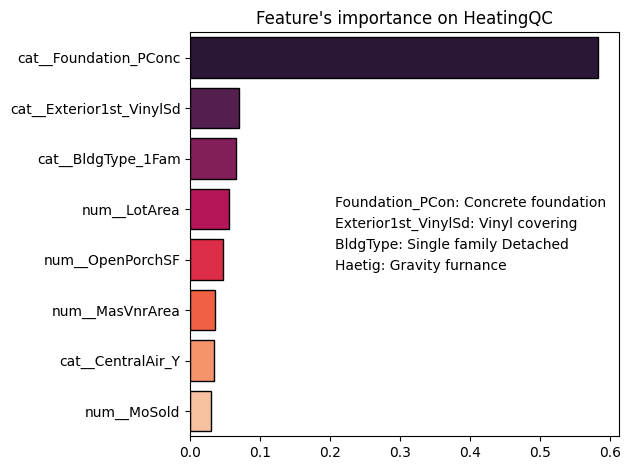

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = tree.feature_importances_
columns_3 = full_pipeline3.get_feature_names_out()
df_importances = pd.DataFrame([importances], columns = columns_3)
df_importances.sort_values(axis=1, by = 0, ascending = False, inplace = True)
#barplot
ax = sns.barplot(df_importances[df_importances.columns[:8]], palette = 'rocket', saturation =2.0, edgecolor = 'black', linewidth = 1, orient = 'h')
#legend
glossary = ["Foundation_PCon: Concrete foundation", "Exterior1st_VinylSd: Vinyl covering", "BldgType: Single family Detached", "Haetig: Gravity furnance"]
ax.legend(labels = glossary, loc = 'center right', frameon = False, handlelength=0, handletextpad=0,)
plt.title(f"Feature's importance on HeatingQC")
plt.tight_layout()
plt.show()

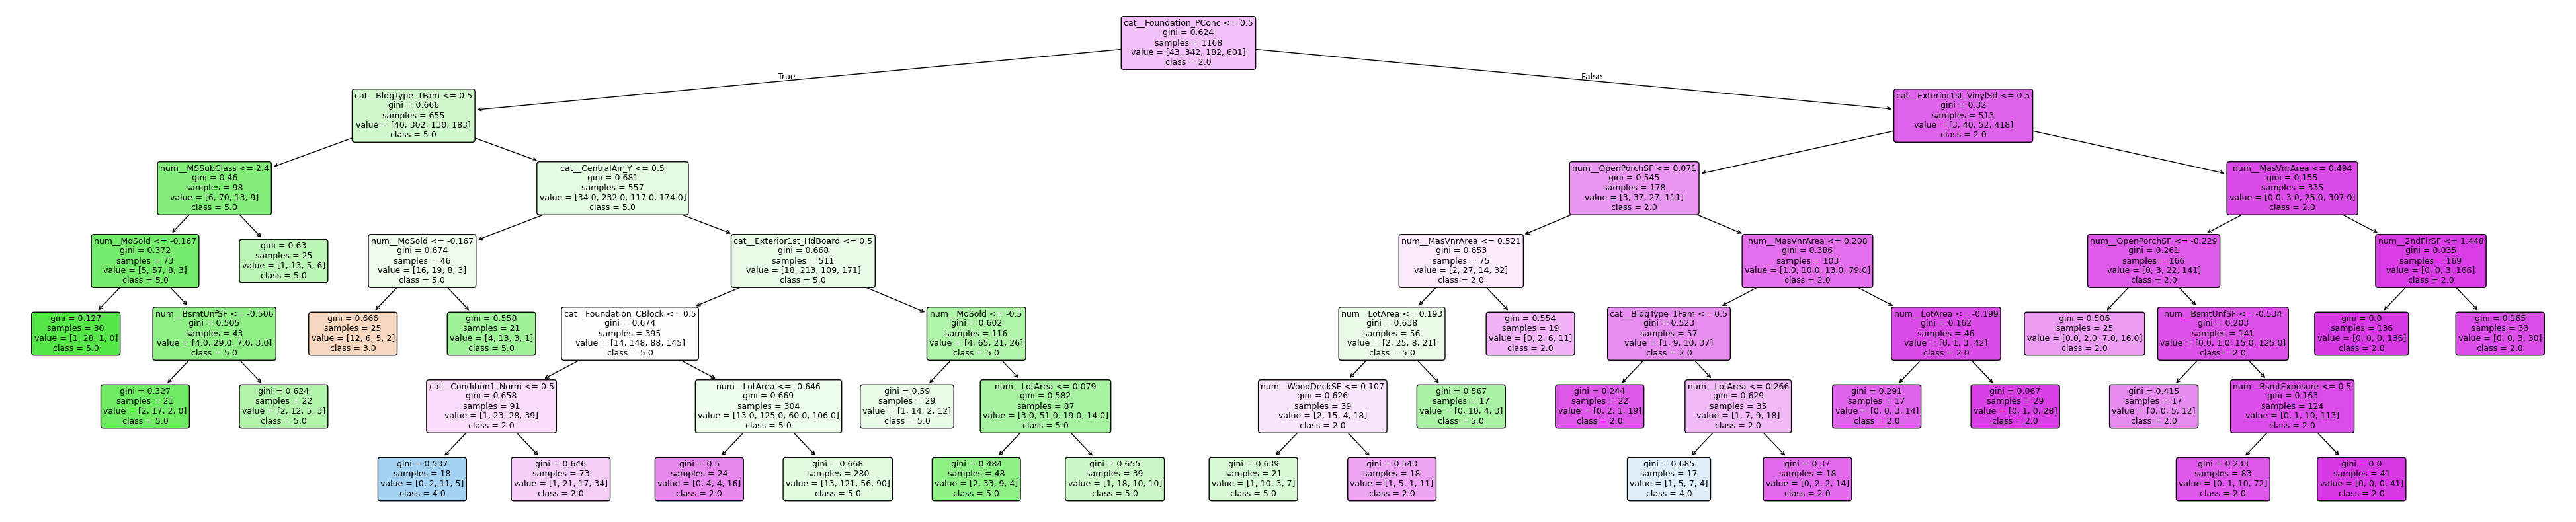

In [55]:
from sklearn.tree import plot_tree
class_names3 = list(map(str, y3.unique()))
plt.figure(figsize=(50, 10))
plot_tree(tree, feature_names = columns_3, class_names = class_names3, filled=True, rounded=True, fontsize = 9)
plt.show()

## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, random_state=42)
random_forest.fit(X3, y3)
y_train_pred_random = random_forest.predict(X3)
y_test_pred_random = random_forest.predict(test_transformed_3)

In [57]:
train_acc_random = accuracy_score(y3, y_train_pred_random)
test_acc_random = accuracy_score(test_y3, y_test_pred_random)
print(f"Train accuracy: {train_acc_random}")
print(f"Test accuracy: {test_acc_random}")

Train accuracy: 0.9931506849315068
Test accuracy: 0.613013698630137


In [58]:
feature_importances_random = pd.DataFrame(random_forest.feature_importances_,
                                   index = columns_3,
                                   columns=['importance']).sort_values('importance', ascending=False)

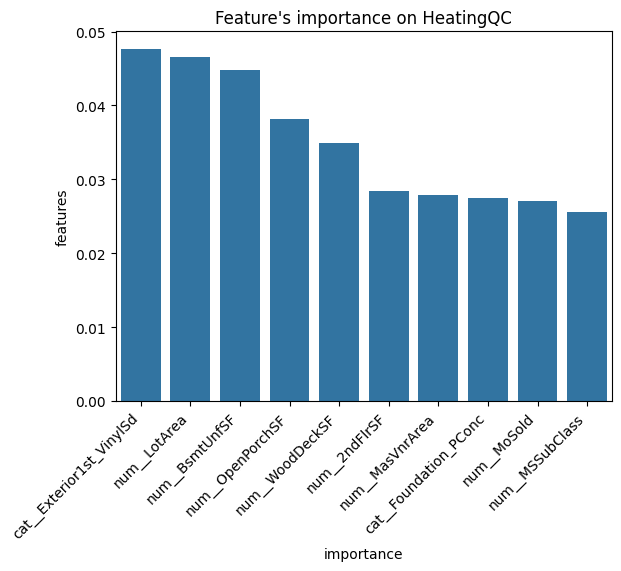

In [59]:
sns.barplot(x = feature_importances_random.index[:10], y = feature_importances_random.importance[:10])
plt.xlabel("importance")
plt.ylabel("features")
plt.title("Feature's importance on HeatingQC")
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [60]:
cm = confusion_matrix(test_y3, y_test_pred_random)
print(f'Confusion matrix\n{cm}')

Confusion matrix
[[  0   0   1   0   0]
 [  0   0   3   2   1]
 [  0   1  57  11  17]
 [  0   0  19  11  29]
 [  0   0  18  11 111]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_y3, y_test_pred_random))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.58      0.66      0.62        86
           4       0.31      0.19      0.23        59
           5       0.70      0.79      0.74       140

    accuracy                           0.61       292
   macro avg       0.32      0.33      0.32       292
weighted avg       0.57      0.61      0.59       292



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Gradient Boosting
next estimator is trained with the residuals errors made by previous estimator.
+ early stopping until error doesn't change significantly

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 1000):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X3, y3)
  y3_pred_gbrt = gbrt.predict(X3)
  val_error = mean_squared_error(y3, y3_pred_gbrt)
  if val_error < 0.997 * min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
        break # early stopping

In [63]:
gbrt.n_estimators

297

In [64]:
train_acc_gbrt = accuracy_score(y3, np.round(y3_pred_gbrt, decimals = 0))
#test_acc_random = accuracy_score(test_y3, y_test_pred_random)
print(f"Train accuracy: {train_acc_gbrt}")
#print(f"Test accuracy: {test_acc_random}")

Train accuracy: 0.6113013698630136


## Clustering

### Multicolinearity by PCA (Principle Components Analysis)

to do Kmeans with SalePrice and any variable highly correlated to it.

After VIF (50 variables):
SalePrice
SalePrice	1.000000
Fireplaces	0.461925
MasVnrArea	0.447998
BsmtExposure	0.359369
WoodDeckSF	0.343958
2ndFlrSF	0.333698
OpenPorchSF	0.301856
HalfBath	0.290857
LotArea	0.274809
BsmtFullBath	0.226935
BsmtUnfSF	0.215237
ScreenPorch	0.112756
PoolArea	0.103531
3SsnPorch	0.048304

In [65]:
features2 = housing.select_dtypes(include=np.number)
#from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#scaler = RobustScaler()
scaler = StandardScaler()
features2_scaled = scaler.fit_transform(features2)
from sklearn.decomposition import PCA
pca = PCA()
features2_scaled_pca = pca.fit_transform(features2_scaled)
features2_scaled_pca

array([[-3.88593534e+00,  7.19488194e-01, -2.35599322e+00, ...,
        -4.08877039e-01,  2.08594139e-15, -2.07142523e-17],
       [-2.79538350e+00,  1.70676622e+00,  7.19582715e-01, ...,
        -7.06504300e-02,  2.53227417e-15,  2.13626022e-15],
       [ 6.95285797e-01,  4.93030388e+00,  2.16614816e+00, ...,
         1.10721384e+00, -4.12446130e-15,  9.87028854e-16],
       ...,
       [-2.05160253e+00, -3.28155115e-01, -4.86216464e-01, ...,
        -1.74751396e-01,  3.18641347e-15,  4.56134844e-15],
       [ 2.44379775e-01, -4.06763466e+00, -1.83964172e-02, ...,
        -8.56650597e-02, -1.54716981e-15, -2.29504938e-15],
       [ 3.07511547e+00, -1.42096760e-01,  3.82394913e-01, ...,
        -1.42723210e-01, -3.08484850e-15,  3.66962328e-16]])

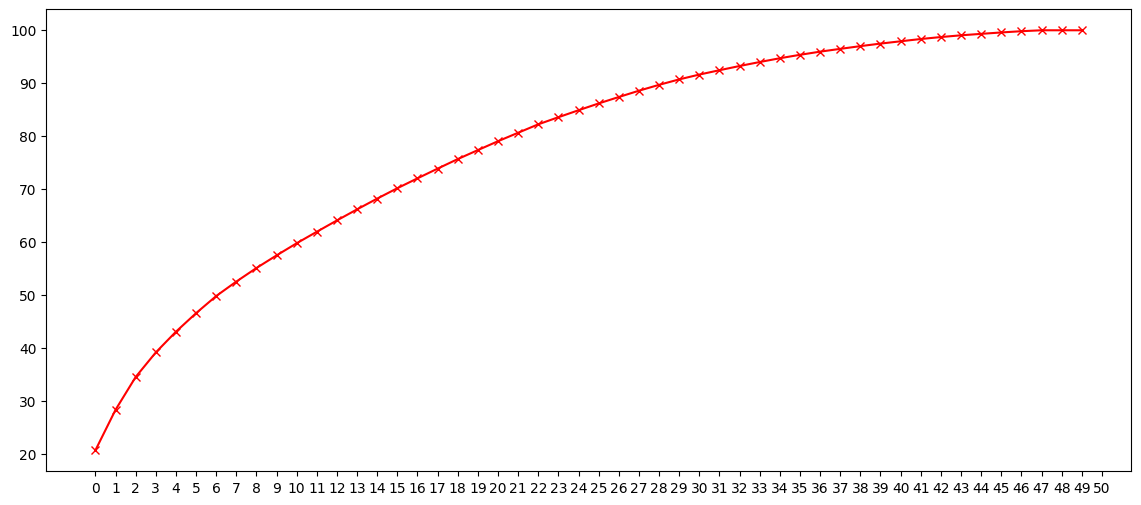

In [66]:
var = pca.explained_variance_ratio_
cum_var =  np.cumsum(np.round(var,decimals = 5)*100)
plt.figure(figsize = (14,6))
plt.plot(cum_var, 'r-x')
plt.xticks(range(0, 51, 1))
plt.show()

In [67]:
pca_data_standard = pd.DataFrame(features2_scaled_pca)
pca_data_standard.drop(range(3, 50), axis = 1, inplace = True)
pca_data_standard

,0,1,2
0,-3.885935,0.719488,-2.355993
1,-2.795384,1.706766,0.719583
2,0.695286,4.930304,2.166148
3,6.595520,1.634214,-1.231561
4,4.247626,0.557641,-0.702069
...,...,...,...
1163,-3.429750,0.134951,0.987104
1164,9.400595,-1.406939,1.686149
1165,-2.051603,-0.328155,-0.486216
1166,0.244380,-4.067635,-0.018396


In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,18)
for _ in K:
  km = KMeans(n_clusters=_, random_state=42)
  y = km.fit_predict(pca_data_standard)
  Sum_of_squared_distances.append(km.inertia_)
  silhouette_scores.append(silhouette_score(pca_data_standard, y))

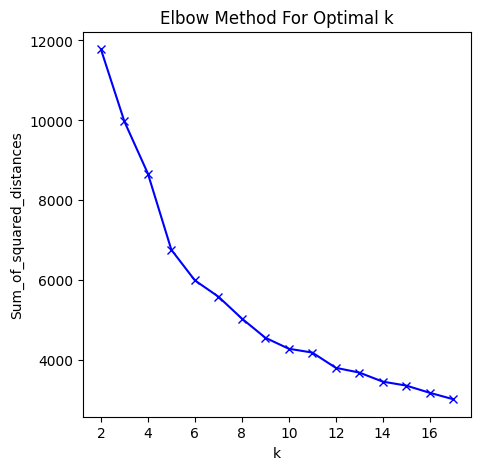

In [69]:
fig = plt.figure(figsize = (5,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

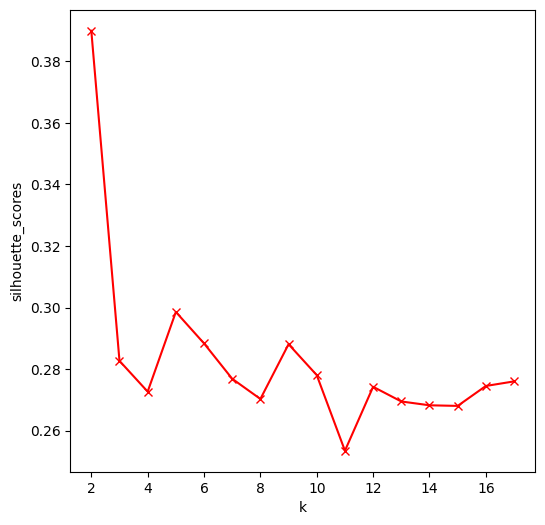

In [70]:
fig = plt.figure(figsize = (6,6))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

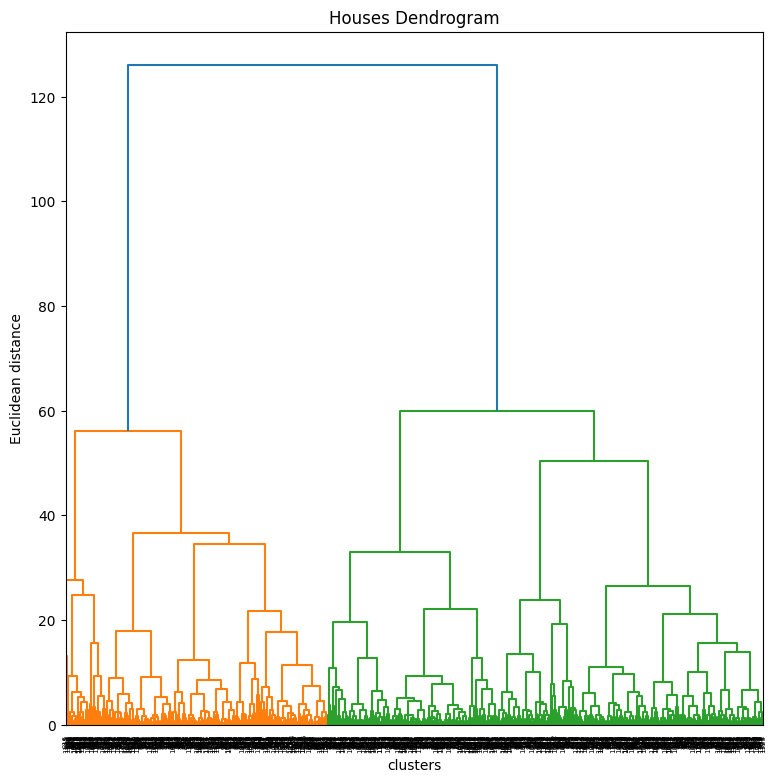

In [71]:
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize = (9,9))
dendogram_plot = dendrogram(linkage(pca_data_standard, method = 'ward' ))
plt.title('Houses Dendrogram')
plt.xlabel('clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
features2['hc_pca'] = y_hc

0.3820843788057238
